Sólo figuras aquí, todos los cálculos serios en el otro notebook please.

In [1]:
using Statistics
using PyPlot
using JLD, HDF5
using Interpolations
push!(LOAD_PATH,"../CenterOfMass/")
using TrayectoriasAux
#acuerdate: no quieres svg interpolados
matplotlib.rcParams[:"svg.image_noscale"]=false
salvadir="/home/karel/Dropbox/ArticulosNeurociencias/misfiguras/"

┌ Info: Recompiling stale cache file /home/karel/.julia/compiled/v1.0/TrayectoriasAux.ji for TrayectoriasAux [top-level]
└ @ Base loading.jl:1190


"/home/karel/Dropbox/ArticulosNeurociencias/misfiguras/"

In [2]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    if abs(xuno-xdos)>= abs(yuno-ydos)

        longitud=abs(xuno-xdos)
        m=(ydos-yuno)/(xdos-xuno)
        xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
        yresult=zeros(Int, longitud+1)
        for j in 1:longitud+1
            yresult[j]=round(Int,yuno+(j-1)*m)
        end
    else
        
        longitud=abs(yuno-ydos)
        m=(xdos-xuno)/(ydos-yuno)
        yresult=collect(yuno:ydos) #asumimos que el ydos es el grande!
        xresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        xresult[j]=round(Int,xuno+(j-1)*m)
    end
   
    end
        
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

Vamos a Graficar Facilitada usando los archivos de abajo

In [3]:
arxlfp="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
datos=h5open(arxlfp)
csd=read(datos["CSDALindenberg"]);
retraso = 0
freq = read(datos["freq"])
lfp=read(datos["LFPSaturados"]);

In [4]:
nmax=size(lfp)[3] #la actividad respuesta se muere poco antes de este cuadro.

2000

Dice Rafael que el F siempre no, que no lo pongamos

In [5]:
puntox=[36,36,36,36,36,36]
puntoy=[6,9,12,15,18,21]
puntol=["f","e", "d", "c", "b","a"];
#=
puntoy=puntoy+3

primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];
=#
(muchasx,muchasy)=ListaPixelesdeLinea([puntox[2],puntox[end]],[puntoy[2],puntoy[end]])
length(muchasx)

13

In [6]:
tiemposinteresantes=(28,63,70,77,84,91,95,98,105)

(28, 63, 70, 77, 84, 91, 95, 98, 105)

In [7]:
CApunts=[[27 45];  [30 51];  [39 61];  [46 62]; [55 57];  [63 43]; [59 22]; [50 11]; [40 6]; [32 4]; [20 7]]

GDpunts=[[16 47]; [18 37]; [23  34]; [29 34]; [35 37]; [39 40]]

6×2 Array{Int64,2}:
 16  47
 18  37
 23  34
 29  34
 35  37
 39  40

In [8]:
gdxin = interpolate( vec( GDpunts[ :,1 ] ), 
    BSpline( Cubic( Flat( OnCell( )
                )
            )
        )
    );
gdyin=interpolate(vec(GDpunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
gdx=gdxin(range(1,6, step=0.25))
gdy=gdyin(range(1,6, step=0.25))

caxin=interpolate(vec(CApunts[:,1]), BSpline(Cubic(Flat(OnCell()))))
cayin=interpolate(vec(CApunts[:,2]), BSpline(Cubic(Flat(OnCell()))))
cax=caxin(range(1,11, step=0.25))
cay=cayin(range(1,11, step=0.25));


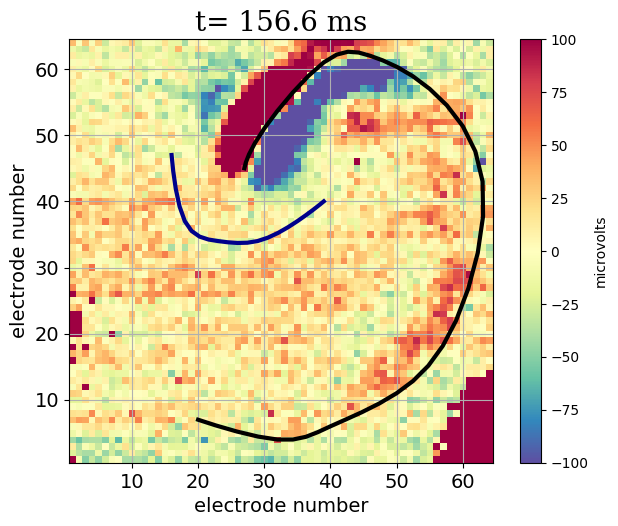

In [9]:
cuadro=1100
exdesaturado=lfp[:,:,cuadro];
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
milisec=round((cuadro-retraso)/freq; digits=1)

title("t= $milisec ms", fontdict=font1)
limites=100
PyPlot.xlim(0.5,64.5)
PyPlot.ylim(0.5,64.5)

#=
for punto in 2:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(5,0), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end
=#

imagen=imshow(exdesaturado, 
interpolation="nearest", cmap="Spectral_r", origin="lower", 
    vmin=-limites, vmax=limites, extent=[0.5,64.5,0.5,64.5])
tick_params(axis="both", labelsize=14)



#scatter(GDpunts[:,1], GDpunts[:,2])
#scatter(CApunts[:,1], CApunts[:,2])

plot(gdx, gdy, lw=3, color="darkblue")
plot(cax, cay, lw=3, color="black")

#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(puntox[2:end],puntoy[2:end], marker="o", s=20, c="b")

#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")

#plot([puntox[2], puntox[end]], [puntoy[2], puntoy[end]], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx.set_label("microvolts") #okey, no hay consenso de cuando es dot overloading y cuando es [:esto]
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)
grid()

savefig(salvadir*"DiagramaLFPFacilitada-$cuadro.svg", dpi=90)

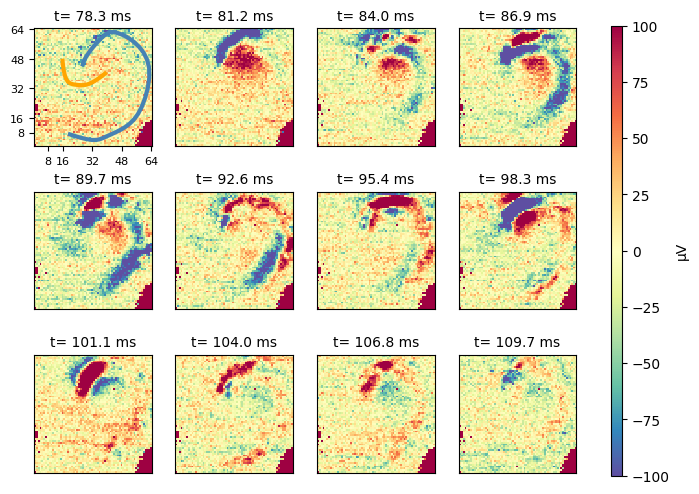

In [10]:
farofa, lista=subplots(3,4, figsize=(7,6)) #mas o menos tamano carta

aux=[]

milisec=round((cuadro-retraso)/freq, digits=1)


for j=1:3, k=1:4
    
    n=((j-1)*4+(k))*20+(530)
    fondo=lfp[:,:,n]
    milisec=round((n-retraso)/freq, digits=1)

    aux=lista[j,k].imshow(fondo, interpolation="nearest", cmap="Spectral_r", 
    origin="lower", vmin=-limites, vmax=limites, extent=[0.5,64.5,0.5,64.5])

     lista[j,k].set_title("t= $milisec ms", fontsize=10)
    
    lista[j,k].set_xlim(0.5,64.5)
    
    if k != 1 || j != 1
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])
        
        
        
    else
        
       lista[j,k].tick_params(labelsize=8)
        lista[j,k].set_xticks([8,16,32,48,64])
        lista[j,k].set_yticks([8,16,32,48, 64])
        
       #= lista[j,k].annotate(".", (58,34), xytext=(63,63),
            arrowprops=Dict("facecolor"=>"black", 
                "shrink"=>0.02, "width"=>1))
        =#
        lista[j,k].plot(gdx, gdy, c="orange", lw=3) 
       lista[j,k].plot(cax, cay, c="steelblue", lw=3)
        
    end
    

end



cbaxes = farofa.add_axes([0.95, 0.12, 0.015, 0.75]) 

 cbxlfp=farofa.colorbar(aux, cax=cbaxes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=80
    #  location="right",
    )
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") #okey, no hay consenso de c

nomsave=salvadir*"lfpfacilitada01.svg"
savefig(nomsave, dpi=150, bbox_inches="tight")

Dice Rafael que quitemos el Punto F y hagamos mas chiquito el Cuadro...

In [11]:
#=
ioff()
for t=retraso:(retraso+2) # nmax
 figura=figure(figsize=(7.0,5.5))
    imagen=imshow(SubDatLFP[:,:,t], origin="lower", interpolation="sinc", 
    vmin=-200,vmax=200, extent=(xizq,xder,ybajo,yalto),cmap="plasma")
 cbx=colorbar(imagen, fraction=0.045) 
    
    savefig("EvocadoPeli-$t.png",dpi=92)
    close(figura)
end
close()
=#

In [12]:
arxcm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
cmpos=load(arxcm, "CMP")
cmneg=load(arxcm, "CMN");

In [13]:
arxcat="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-Tray-todas.jld"
CatenarioPositivo=load(arxcat, "CatenarioPositivo")
CatenarioNegativo=load(arxcat, "CatenarioNegativo");

In [14]:
minlargo= 3

marcagor=25  # 25
#muevemin=0.5
muevemin=1


trayfiltpos=reducecatenario(CatenarioPositivo, gordmin=marcagor, minlong=minlargo, distmin=muevemin)
trayfiltneg=reducecatenario(CatenarioNegativo, gordmin=marcagor, minlong=minlargo, distmin=muevemin);


In [15]:
length(trayfiltneg)

557

In [16]:
function plottray(trayectoria, axss; cpunto="crimson", 
        cinicio="red", cfinal="orangered", zo=20)
  
        #Si son chiquitos no nos interesan.
        xxpos=trayectoria[:,1]
        yypos=trayectoria[:,2]    
        tiempos=trayectoria[:,4]./7022    
        axss.plot(xxpos, yypos, marker="o", markersize=1, color=cpunto, zorder=zo)
        #bolitasrojas=scatter(xxpos,yypos, s=gordura, 
        #edgecolors="none", color="r" )
        inicios=axss.scatter(xxpos[1],yypos[1], s=marcagor, edgecolors="black", 
        linewidth=1,
        facecolor=cinicio, marker="o", zorder=zo+1)
        finales=axss.scatter(xxpos[end],yypos[end], s=marcagor, edgecolors="black", 
        linewidth=1,facecolor=cfinal, marker="^", label="Final" , zorder=zo+2)
      #  annotate(round(tiempos[1]*1000,1),  (xxpos[1], yypos[1]), fon
end

plottray (generic function with 1 method)

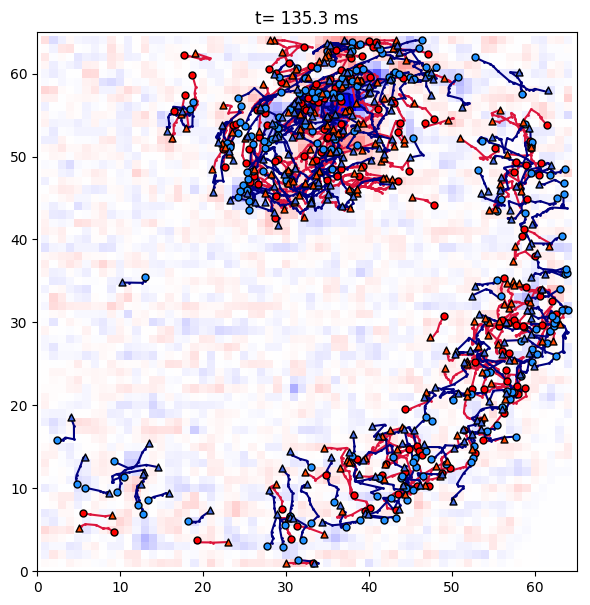

In [41]:
ion()
cuadro=950
excsd=csd[:,:,cuadro];

figura=figure(figsize=(6,6))
#axis("equal")
#tick_params(labelbottom="off", labelleft="off")
xlim(-0,65)
ylim(-0,65)
vlim=75

tight_layout()

n=cuadro-retraso
tau=round(n/freq, digits=1)

title("t= $tau ms")

guacafondo=imshow(excsd, cmap="bwr", 
    interpolation="nearest", origin="lower",
    extent=[0.5,64.5,0.5,64.5],
    vmin=-vlim, vmax=vlim,)

#plot(gdx, gdy, lw=4)
#plot(cax, cay, lw=4)

ejes=gca()

for p in values(trayfiltpos)

    desviax=std(p[:,1])
    desviay=std(p[:,2])

    if  (desviax>muevemin || desviay>muevemin) 
        plottray(p, ejes)
    end
end




for p in values(trayfiltneg)
    desviax=std(map(Float32,p[:,1]))
    desviay=std(map(Float32, p[:,2]))
    if (desviax>muevemin || desviay > muevemin)
        plottray(p, ejes, cpunto="navy", 
        cinicio="dodgerblue", cfinal="royalblue", zo=20)
    end
end

nomout=salvadir*"TrayFacilitada-todas.svg"
savefig(nomout, dpi=90)

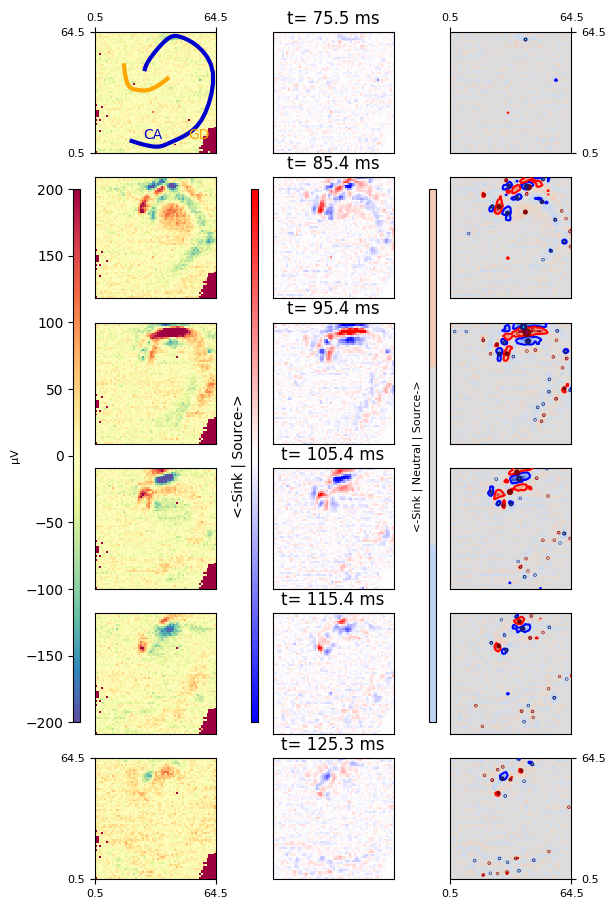

In [17]:
farofa, lista=subplots(6,3, figsize=(6.5,11), gridspec_kw=Dict("height_ratios"=>[1,1,1,1,1,1]))
#mas o menos tamano carta

vlim=200
csdlim1=75
csdlim2=100
freq=7.022
imagenlfp=lista[:,1]
imagencsd=lista[:,2]
imagencou=lista[:,3]
epsi=20
vs=[-epsi,epsi]
xizq=1
xder=64
ybajo=1
yalto=64
(xi,xf,yi,yf)=(xizq-0.5,xder+0.5, ybajo-0.5,yalto+0.5)
exten=[xi,xf,yi,yf]

lat=530 #latencia artificial

#cbax= farofa.add_axes([0.08,0.08, 0.09, 0.8])


for j=1:6
    n=retraso+lat+(j-1)*70
      lfpcuad=lfp[:,:,n]  
      csdcuad=csd[:,:,n]  
    tau=round(n/freq, digits=1)
    tit="t= $tau ms"

    
  for k=1:3  
  lista[j,k].set_xlim([xi,xf])
  lista[j,k].set_ylim([yi, yf])
  end
    
    
 imagenlfp=lista[j,1].imshow(lfpcuad, origin="lower", vmin=-vlim, vmax=vlim,
        extent=exten,
        cmap="Spectral_r", interpolation="nearest")
 
    
      #uando es dot overloading y cuando es [:esto]
    
 imagencsd=lista[j,2].imshow(csdcuad, origin="lower", vmin=-csdlim1, vmax=csdlim1,
       extent=exten,
        cmap="bwr",interpolation="nearest")
 lista[j,2].set_title(tit)

xxpos=cmpos[n][:,1]
yypos=cmpos[n][:,2]
gorpos=cmpos[n][:,3]./300

xxneg=cmneg[n][:,1]
yyneg=cmneg[n][:,2]
gorneg=abs.(cmneg[n])[:,3]./300

 imagencou=lista[j,3].imshow(csdcuad, origin="lower", 
        vmin=-csdlim2, vmax=csdlim2, 
        cmap="coolwarm", 
        interpolation="nearest",
        extent=exten, 
        zorder=1)

  
    lista[j,3].scatter(xxpos, yypos, s=gorpos, c="purple", edgecolor="maroon", lw=2, zorder=5)
lista[j,3].scatter(xxneg, yyneg, s=gorneg, c="cyan", edgecolor="midnightblue", lw=2, zorder=5)

 lista[j,3].contour(csdcuad, vs, lw=3, colors=("blue", "red"),
        extent=exten, 
        zorder=4)
   

#  
    for k=1:3
        lista[j,k].set_xticks([])
        lista[j,k].set_yticks([])

    end
    

end

#===== =00000000000000000000000000           =#

     lista[1,1].tick_params(labelsize=8, top=true, right=false, 
             left=true, bottom=false, labeltop=true, labelbottom=false)
         lista[1,3].tick_params(labelsize=8, top=true, right=true,
    labelleft=false,
             left=false, bottom=false, labeltop=true, labelright=true,
    labelbottom=false)
    lista[6,1].tick_params(labelsize=8, top=false, right=false, 
             left=true, bottom=true, labeltop=false, labelbottom=true)
         lista[6,3].tick_params(labelsize=8, top=false, right=true,
    labelleft=false,
             left=false, bottom=true, labeltop=false, labelright=true,
    labelbottom=true)


    
for j in (1,6), k in (1,3)
        #lista[j,k].set_xticks([1,16,32,48,64])
        #lista[j,k].set_yticks([1,16,32,48,64])
        lista[j,k].set_xticks([xi,xf])
        lista[j,k].set_yticks([yi,yf])

end


  lista[1,1].annotate("CA", xy=(26,8), color="mediumblue")
    lista[1,1].annotate("GD", xy=(50,8), color="orange")

       # lista[1,1].plot(gdx, gdy, c="orange", lw=3) 
       lista[1,1].plot(cax, cay, c="mediumblue", lw=3)
           lista[1,1].plot(gdx, gdy, c="orange", lw=3)


 cbxlfp=farofa.colorbar(imagenlfp, ax=lista[:,1], shrink=1.0, 
      location="left", aspect=80, fraction=0.045)
#cbxlfp.ax.tick_params(labelsize=8)
    
  cbxlfp.set_label(label="µV", size=8) #okey, no hay consenso de c

 cbxcsd=farofa.colorbar(imagencsd, ax=lista[:,2], shrink=1.0,
      location="left", aspect=80, fraction=0.045, ticks=[])
   cbxcsd.set_label(label="<-Sink | Source->")


 cbxcou=farofa.colorbar(imagencou, ax=lista[:,3], shrink=1.0,
      location="left", aspect=80, fraction=0.045, ticks=[], 
    values=[-epsi, 0,epsi] , boundaries=[-csdlim2,-1, 1,csdlim2])
   cbxcou.set_label(label="<-Sink | Neutral | Source->", size=8)

#=
nomsave=salvadir*"TablaLFPCSDCM-Facilitada."
nomsave1=nomsave*"pdf"
nomsave2=nomsave*"svg"
nomsave3=nomsave*"png"

#tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


for nomine in (nomsave1, nomsave2, nomsave3) 
    savefig(nomine,dpi=100)
end
=#

11
13
61
63


1 1 15  15 530
1 2 26  26 550
1 3 31  31 570
2 1 75  75 650
2 2 87  87 670
2 3 95  95 690
3 1 130  130 770
3 2 140  140 790
3 3 146  146 810
4 1 167  167 890
4 2 173  173 910
4 3 176  176 930
5 1 202  202 1010
5 2 208  208 1030
5 3 215  215 1050


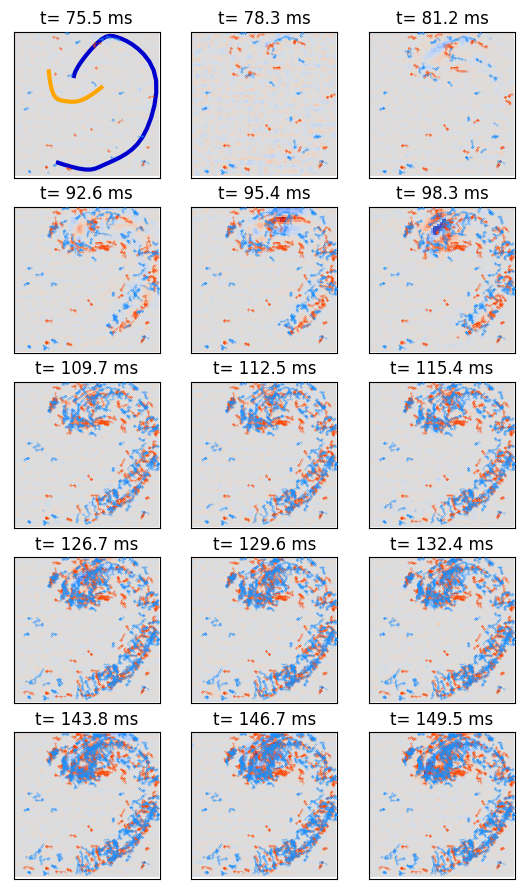

  4.533006 seconds (4.13 M allocations: 171.333 MiB, 1.27% gc time)


In [61]:
farofa, lista=subplots(5,3, figsize=(6.5,11)) #mas o menos tamano carta

csdlim1=150
freq=7.022
imagenlfp=lista[:,1]
imagencsd=lista[:,2]
epsi=25
vs=[-epsi,epsi]
(xi,xf,yi,yf)=(0.5,0.5, 64.5,64.5)
exten=[xi,xf,yi,yf]
#cbax= farofa.add_axes([0.08,0.08, 0.09, 0.8])
#latencia de interes
paso=20
matachicas=5

trayfiltposaux=reducecatenario(CatenarioPositivo, gordmin=marcagor, 
    minlong=matachicas, distmin=muevemin)
trayfiltnegaux=reducecatenario(CatenarioNegativo, gordmin=marcagor, 
    minlong=matachicas, distmin=muevemin);
     

lista[1,1].plot(cax, cay, c="mediumblue", lw=3)
lista[1,1].plot(gdx, gdy, c="orange", lw=3)


@time for j=1:5, k=1:3
    
    n=lat+(j-1)*paso*6+(k-1)*paso
    csdcuad=csd[:,:,n]  
    tau=round((n)/freq, digits=1)
    tit="t= $tau ms"
   
    
    lista[j,k].set_xlim([xizq-0.5,xder+0.5])
    lista[j,k].set_ylim([ybajo-0.5, yalto+0.5])
    
    
    lista[j,k].set_title(tit)

    lista[j,k].set_xticks([])
    lista[j,k].set_yticks([])
    
    #ejes=axes(lista[j,k])
    
    
    lista[j,k].imshow(csdcuad, origin="lower", 
        vmin=-csdlim1, vmax=csdlim1, cmap="coolwarm", 
        interpolation="nearest",
        extent=[xizq,xder,ybajo,yalto], 
        zorder=1)
    
    
     kuku=0
    
    trpfilt=cortacatenarios(trayfiltposaux, nini=lat, nfin=n+paso )
    koko=length(trpfilt)
    
    for p in values(trpfilt)
            kuku=kuku+1
            xxpos=p[:,1]
            yypos=p[:,2]    
    #        plottray(p, ejes) 
          lista[j,k].plot(xxpos, yypos, marker="o", markersize=0.2, 
                color="orangered", lw=0.25,zorder=4)
     end
    
            
    println(j, " ", k, " ", kuku, "  ",  koko, " ", n)
    
    
    trnfilt=cortacatenarios(trayfiltnegaux, nini=lat, nfin=n+paso )


    for p in values(trnfilt)
         
        paux=AntesQue(p,n+paso)
        paux=DespuesQue(paux,retraso)
        cucho,fleto=size(paux)
    
        if  (p[end,4] >= retraso) && cucho>0
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
         lista[j,k].plot(xxpos, yypos, marker="o", markersize=0.2, 
                color="dodgerblue", lw=0.25,zorder=4)
        end
   end
    
 
end

nomsave=salvadir*"TablaTrayectorias_Facilitada_poraparicion."
nomsave1=nomsave*"pdf"
nomsave2=nomsave*"svg"
nomsave3=nomsave*"png"

#tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


for nomine in (nomsave1, nomsave2, nomsave3) 
    savefig(nomine,dpi=100)
end
